# Ejemplo simple de Análisis de Sentimiento

Veremos un ejemplo simple de un análisis de sentimiento de texto, basado en Tensorflow.



In [17]:
import keras.models
import numpy as np
import pandas as pd

from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.5.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [10]:
#Trabajaremos con el dataset de IMDB movie reviews

train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"],
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

INFO:absl:No config specified, defaulting to first: imdb_reviews/plain_text
INFO:absl:Generating dataset imdb_reviews (C:\Users\franc\tensorflow_datasets\imdb_reviews\plain_text\1.0.0)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

INFO:absl:Downloading http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz into C:\Users\franc\tensorflow_datasets\downloads\ai.stanfor.edu_amaas_sentime_aclImdb_v1PaujRp-TxjBWz59jHXsMDm5WiexbxzaFQkEnXc3Tvo8.tar.gz.tmp.b8ff0bbf971c4ecc91c4e5fa1922568b...


Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-train.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

INFO:absl:Done writing imdb_reviews-train.tfrecord. Number of examples: 25000 (shards: [25000])


Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-test.tfrecord...:   0%|          | 0/25000 [00:00<?, ? examples/s]

INFO:absl:Done writing imdb_reviews-test.tfrecord. Number of examples: 25000 (shards: [25000])


Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling imdb_reviews-unsupervised.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

INFO:absl:Done writing imdb_reviews-unsupervised.tfrecord. Number of examples: 50000 (shards: [50000])
INFO:absl:Constructing tf.data.Dataset imdb_reviews for split ['train', 'test'], from C:\Users\franc\tensorflow_datasets\imdb_reviews\plain_text\1.0.0


Dataset imdb_reviews downloaded and prepared to C:\Users\franc\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


In [20]:
#Validation set
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [13]:
#Veamos la data
print( train_examples.shape )
print( test_examples.shape )

print( train_examples[-10:] )

(25000,)
(25000,)
[b"Well done Al Gore! You have become the first person to have made 1 Billion dollars of the global warming lie! Just like all the other man made fable's in the world this one is up there with the best lies to have sucked in so many people. Sure polution is not a good thing, and I would love for all the tree's to keep on growing, but global warming is a business! It employes thousands of people that are all very mislead.<br /><br />Google it! There are just to many things that just don't add up, but well done Al, you failed as a politician, but went on to make lots of money sucking in the world.<br /><br />Whats next? Santa is real?"
 b"The brilliance of this movie is that even a competent dentist is pretty scary. It's one of man's primal fears. This movie is the nightmarish image every kid has to go through in the waiting room. Corbin Bernsen gives a surprisingly non-lackluster performance as a crazed dentist who I guess tries to kill people but he only works on thei

In [14]:
#Usaremos una capa de embedding para procesar el texto
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable= True)

#probemos la capa
hub_layer(train_examples[:3])


INFO:absl:Using C:\Users\franc\AppData\Local\Temp\tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim50/2'.
INFO:absl:Downloading https://tfhub.dev/google/nnlm-en-dim50/2: 160.00MB
INFO:absl:Downloaded https://tfhub.dev/google/nnlm-en-dim50/2, Total size: 191.83MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/nnlm-en-dim50/2'.


<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423195 , -0.0119017 ,  0.06337538,  0.06862972, -0.16776837,
        -0.10581174,  0.16865303, -0.04998824, -0.31148055,  0.07910346,
         0.15442263,  0.01488662,  0.03930153,  0.19772711, -0.12215476,
        -0.04120981, -0.2704109 , -0.21922152,  0.26517662, -0.80739075,
         0.25833532, -0.3100421 ,  0.28683215,  0.1943387 , -0.29036492,
         0.03862849, -0.7844411 , -0.0479324 ,  0.4110299 , -0.36388892,
        -0.58034706,  0.30269456,  0.3630897 , -0.15227164, -0.44391504,
         0.19462997,  0.19528408,  0.05666234,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201318 , -0.04418665, -0.08550783,
        -0.55847436, -0.23336391, -0.20782952, -0.03543064, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862679,  0.7753425 , -0.07667089,
        -0.15752277,  0.01872335, -0.08169781, -0.3521876 ,  0.4637341 ,
        -0.08492756,  0.07166859, -0.00670817,  0.12686075, -0.19326553,
 

In [39]:
#Ahora podemos construir el modelo de clasificación

model = keras.models.Sequential([
    hub_layer,
    keras.layers.Dense(units = 16, activation = 'relu'),
    keras.layers.Dense(units = 1)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense_4 (Dense)              (None, 16)                816       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='adam',
              loss = tf.losses.BinaryCrossentropy(from_logits=True),
              metrics = [tf.metrics.BinaryAccuracy()]
              )


In [41]:
#Let's train!
earlystop = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights= True)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1,
                    callbacks=[earlystop]
                    )

Epoch 1/40
30/30 [==============================] - 3s 73ms/step - loss: 0.6331 - binary_accuracy: 0.5355 - val_loss: 0.5286 - val_binary_accuracy: 0.6191

In [42]:
#Evaluar
results = model.evaluate(test_data, test_labels)

print(results)


782/782 [==============================] - 5s 6ms/step - loss: 0.3291 - binary_accuracy: 0.8474

In [43]:
#Plotting training
import pandas as pd
history_dict = pd.DataFrame(history.history)
history_dict.head()

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.633107,0.535467,0.528606,0.6191
1,0.358396,0.852667,0.389845,0.8258
2,0.196952,0.978800,0.326254,0.8628
3,0.112648,0.995267,0.305835,0.8629
4,0.069483,0.998133,0.302238,0.8693


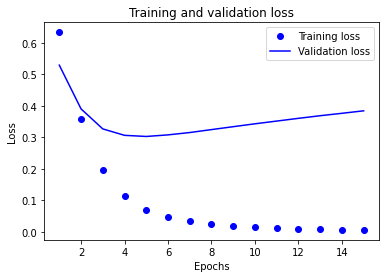

In [44]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

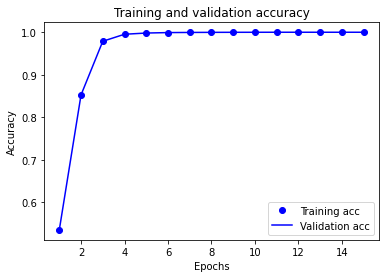

In [45]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()